# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

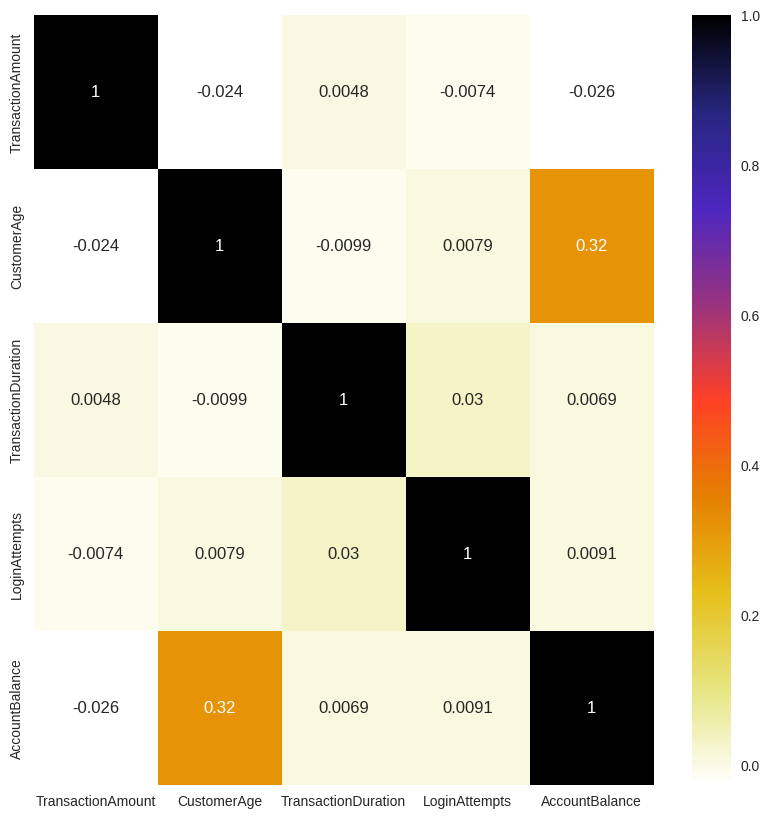

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
numeric_fitur = df.select_dtypes(include=['float64']).columns
corel = df[numeric_fitur].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corel, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

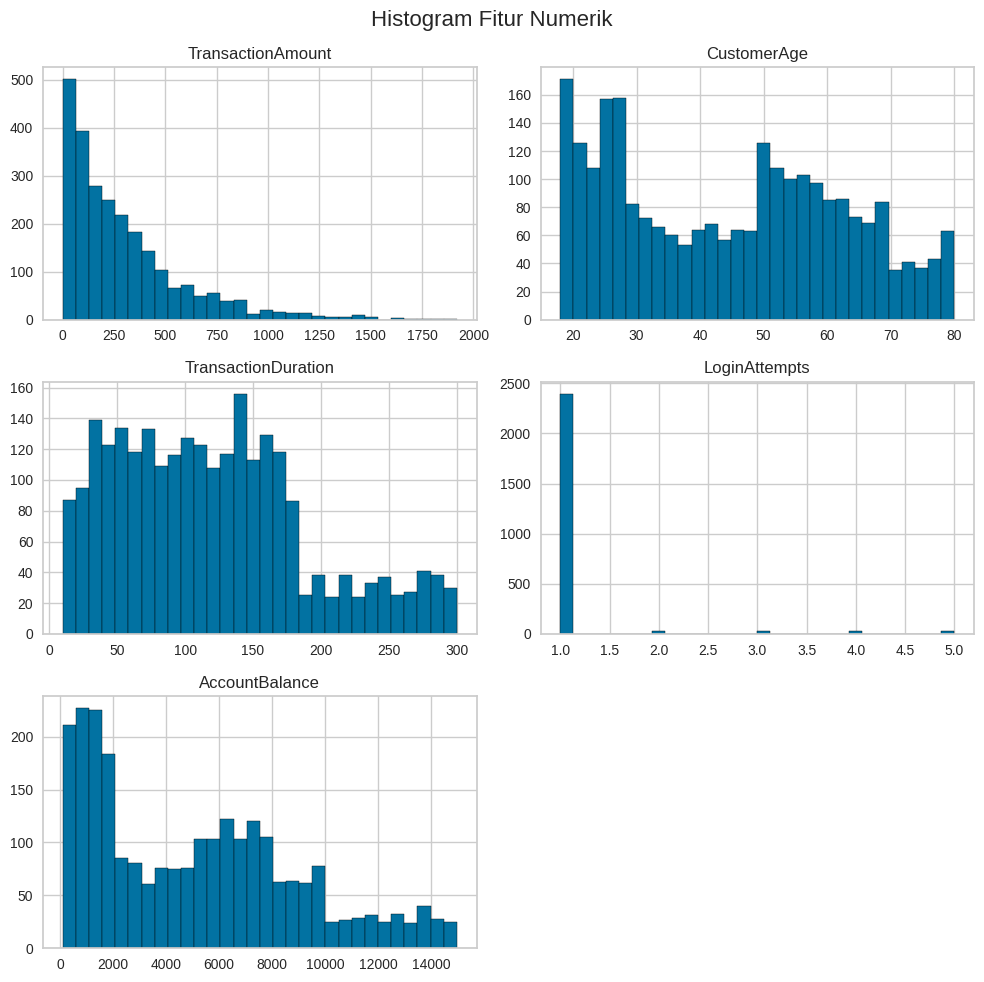

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df[numeric_fitur].hist(bins=30, figsize=(10, 10), edgecolor='black')
plt.suptitle("Histogram Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

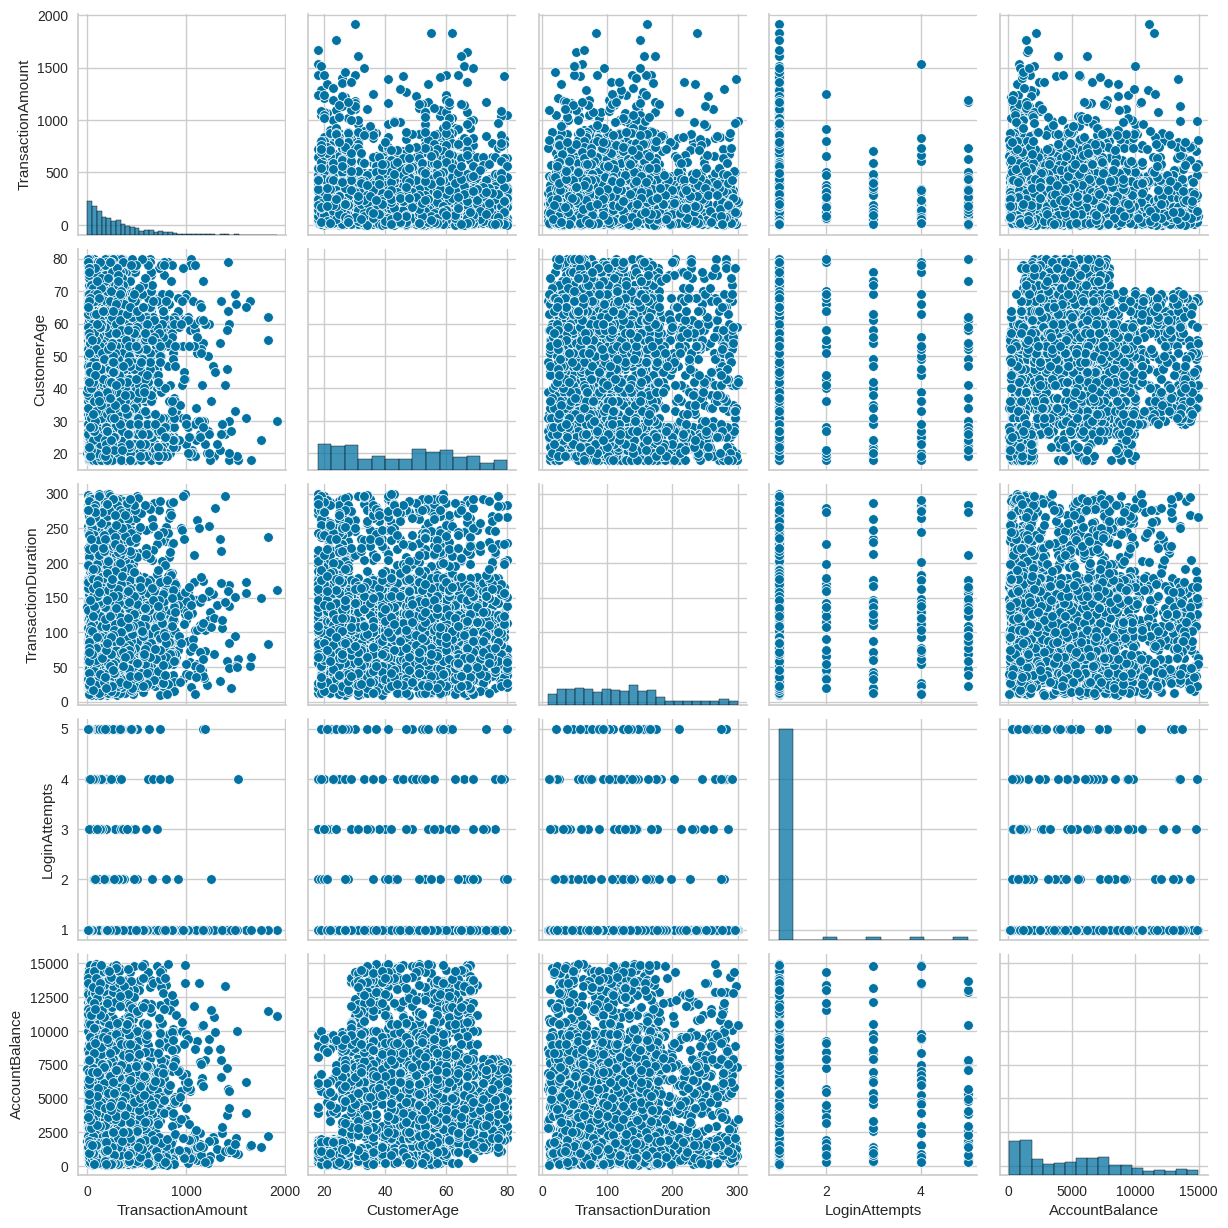

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.pairplot(df[numeric_fitur])

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [11]:
# Melakukan feature scaling menggmenggunakanunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
df1 = df.copy()
fitur_Scale = df[numeric_fitur].columns
minmax_scale = MinMaxScaler()
df1[fitur_Scale] = minmax_scale.fit_transform(df1[fitur_Scale])
df1.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df1.drop(['TransactionID','AccountID','DeviceID','IP Address','MerchantID'],axis = 1, inplace=True)

In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
label_Encoder = LabelEncoder()
fitur_Encoder = ['PreviousTransactionDate','TransactionType','Location','Channel','CustomerOccupation','TransactionDate']
for col in fitur_Encoder:
    df1[col]=label_Encoder.fit_transform(df1[col])
df1.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
df1.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang
df1 = df1.dropna()

In [16]:
df1.isnull().sum()

,0
TransactionAmount,0
PreviousTransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [17]:
# Menghapus data duplikat menggunakan drop_duplicates().
df1 = df1.drop_duplicates()

In [18]:
df1.duplicated().sum()

np.int64(0)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

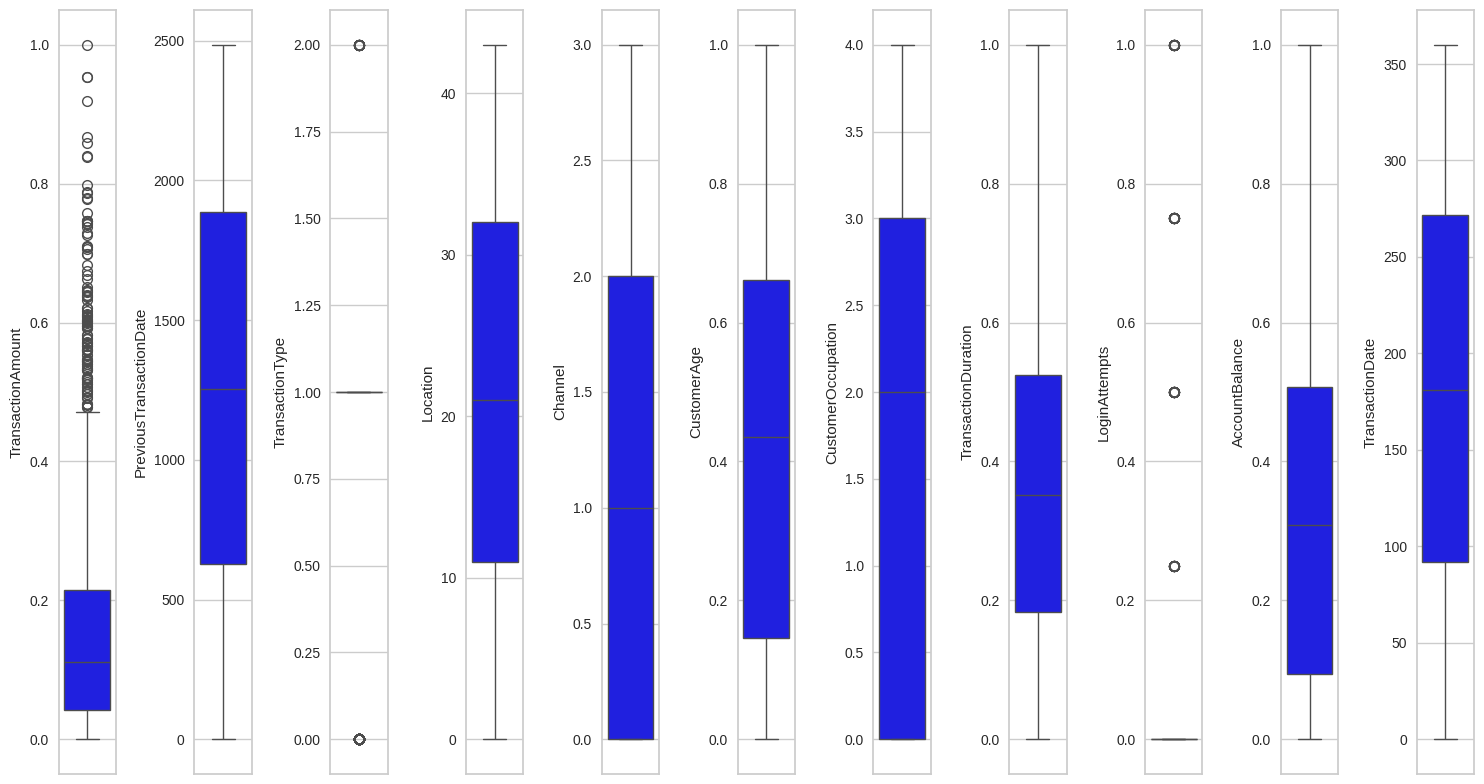

In [19]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
plt.figure(figsize=(15,8))
for i in range(0, len(df1.columns)):
    plt.subplot(1, len(df1.columns), i+1)
    sns.boxplot(y=df1[df1.columns[i]], color='blue')
    plt.tight_layout()

In [20]:
for col in df1:
    # Melihat outlier dengan IQR (Interquartile Range)
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus outlier dari DataFrame
    df1[col] = df1[col].clip(lower_bound, upper_bound)

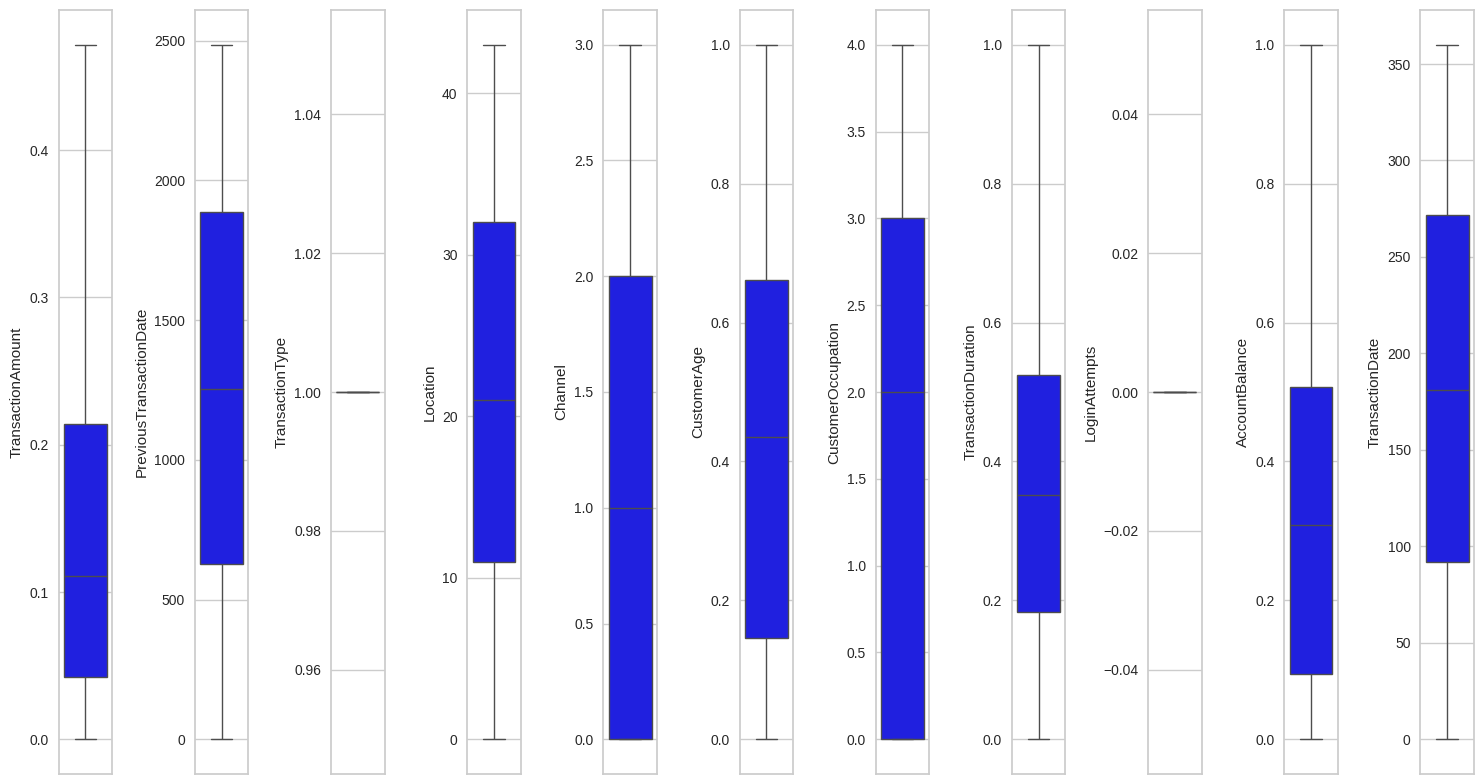

In [21]:
plt.figure(figsize=(15,8))
for i in range(0, len(df1.columns)):
    plt.subplot(1, len(df1.columns), i+1)
    sns.boxplot(y=df1[df1.columns[i]], color='blue')
    plt.tight_layout()

In [22]:
# # Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# # lakukan pada satu sampai dua fitur numerik.
# # Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# # Pastikan kamu mengerjakan tahapan ini pada satu cell.
df1['AmountCategory'] = pd.qcut(df1['TransactionAmount'], q=3, labels=['Low', 'Medium', 'High'])
df1['AgeGroup'] = pd.qcut(df1['CustomerAge'], q=3, labels=['Teenager', 'Adult', 'Senior'])

# # Encode hasil binning menggunakan LabelEncoder
le_amount = LabelEncoder()
le_age = LabelEncoder()
df1['AmountCategory'] = le_amount.fit_transform(df1['AmountCategory'])
df1['AgeGroup'] = le_age.fit_transform(df1['AgeGroup'])

df1.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AmountCategory,AgeGroup
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,1,1
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,0,1
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,2,2
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,2,2
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,1,2


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [23]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
df1.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AmountCategory,AgeGroup
count,2398.000000,2398.000000,2398.0,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2398.0,2398.000000,2398.000000,2398.000000,2398.000000
mean,0.148038,1256.404921,1.0,21.383653,1.013344,0.429323,1.532110,0.377521,0.0,0.335330,180.984987,0.999583,0.995830
std,0.130359,726.716182,0.0,12.417622,0.831075,0.287681,1.153802,0.242365,0.0,0.262236,103.757245,0.816752,0.822595
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.042624,626.250000,1.0,11.000000,0.000000,0.145161,0.000000,0.182759,0.0,0.093288,92.000000,0.000000,0.000000
50%,0.110829,1254.500000,1.0,21.000000,1.000000,0.435484,2.000000,0.351724,0.0,0.308010,181.000000,1.000000,1.000000
75%,0.214235,1884.750000,1.0,32.000000,2.000000,0.661290,3.000000,0.524138,0.0,0.507822,271.750000,2.000000,2.000000
max,0.471651,2485.000000,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,2.000000,2.000000


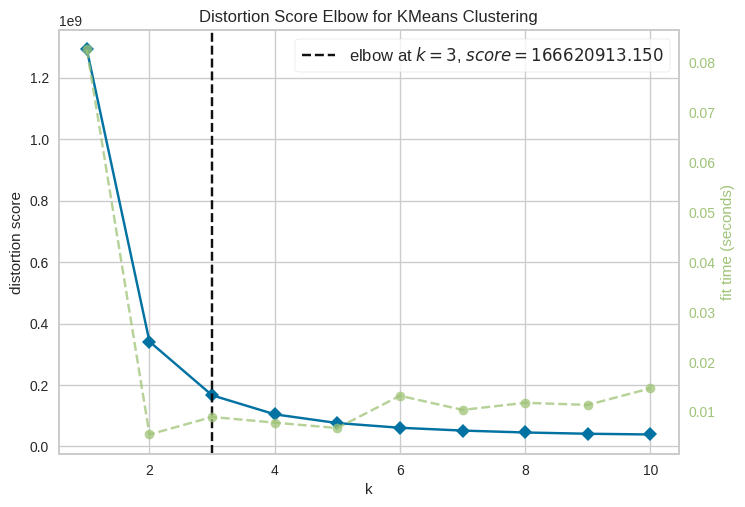

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
# MelakukaMelakukanMelakukann visualisasi Elbow Method mmenggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1,11))
visualizer.fit(df1)
visualizer.show()

In [25]:
# Menggunakan algoritma K-Means Clustering
k_optimal = 3
kmeans = KMeans(k_optimal, random_state=42)
cluster_labels = kmeans.fit_predict(df1)
# Menambahkan kolom cluster untuk hasil cluster
df1['Cluster'] = cluster_labels

Jalankan cell code ini untuk menyimpan model kamu.

In [26]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(df1, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [27]:
# Menghitung dan menampilkan nilai Silhouette Score.
score_silhouette = silhouette_score(df1.drop('Cluster',axis=1), cluster_labels)
print(f"Silhouette Score : {score_silhouette:.4f}")

Silhouette Score : 0.5404


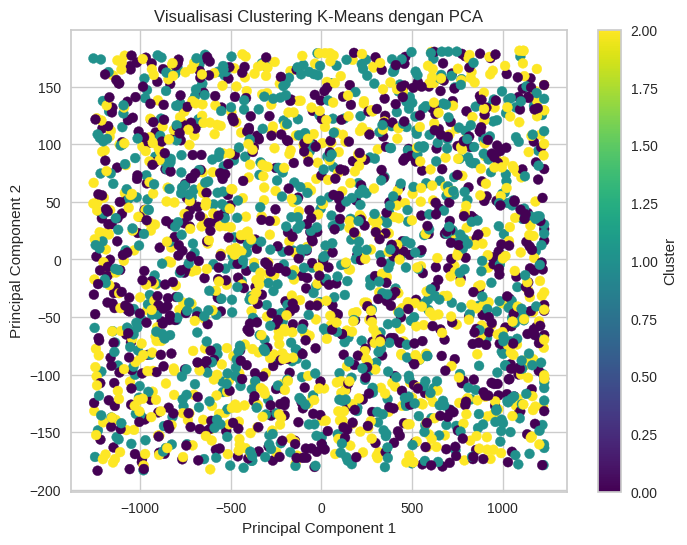

In [28]:
# Membuat visualisasi hasil clustering
pca = PCA(n_components=2)
df_PCA = pca.fit_transform(df1.drop('Cluster', axis=1))

# Buat DataFrame visualisasi
df_PCA = pd.DataFrame(df_PCA, columns=['PC1', 'PC2'])
df_PCA['Cluster'] = df1['Cluster']

# Visualisasi
plt.figure(figsize=(8, 6))
plt.scatter(df_PCA['PC1'], df_PCA['PC2'], c=df_PCA['Cluster'], cmap='viridis', s=50)
plt.title('Visualisasi Clustering K-Means dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [29]:
# Membangun model menggunakan PCA.
pca =PCA(n_components=2)
df1_pca = pca.fit_transform(df1)
# Menyimpan data PCA sebagai Dataframe
df1_pca = pd.DataFrame(df1_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(df1_pca)

KMeans(n_clusters=3)

In [30]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [31]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
numerik = df1.select_dtypes(include=['float64','int64']).columns
analisis_group = df1.groupby('Cluster')[numerik].agg(['mean', 'min', 'max', 'median'])
pd.set_option('display.max_columns', None)
# Tampilkan hasilnya
print(analisis_group)

        TransactionAmount                                \
                     mean       min       max    median   
Cluster                                                   
0                0.150045  0.000000  0.471651  0.112286   
1                0.144775  0.000313  0.471651  0.107189   
2                0.149297  0.000031  0.471651  0.109706   

        PreviousTransactionDate                     TransactionType          \
                           mean   min   max  median            mean min max   
Cluster                                                                       
0                   2095.230961  1674  2485  2097.0             1.0   1   1   
1                    418.382500     0   836   417.5             1.0   1   1   
2                   1254.545797   837  1673  1254.0             1.0   1   1   

                 Location                  Channel                CustomerAge  \
        median       mean min max median      mean min max median        mean   
Cluster 

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1 (0): Nasabah Transaksi Besar dan Saldo Normal**:
  - **Rata-rata (mean) TransactionAmount:** 0.150045 (Min : 0.000000, Max : 0.471651, Median : 0.112286) <Setelah inverse>
  - **Rata-rata (mean) PreviousTransactionDate:** 2095.230961 (Min : 1674, Max : 2485, Median : 2097.0) <Setelah inverse>
  - **Rata-rata (mean) TransactionType:** 1.0 (Min : 1, Max : 1, Median : 1.0) <Setelah inverse>
  - **Rata-rata (mean) Location:** 21.534332 (Min : 0, Max : 43, Median : 22.0)<Setelah inverse>
  - **Rata-rata (mean) Channel:** 1.054931 (Min : 0, Max : 3, Median : 1.0)<Setelah inverse>
  - **Rata-rata (mean) CustomerAge:** 0.428094 (Min : 0.0, Max : 1.0, Median : 0.435484)<Setelah inverse>
  - **Rata-rata (mean) CustomerOccupation:** 1.523096 (Min : 0, Max : 4, Median : 1.0)<Setelah inverse>
  - **Rata-rata (mean) TransactionDuration:** 0.382203 (Min : 0.0, Max : 1.000000, Median : 0.344828)<Setelah inverse>
  - **Rata-rata (mean) Login Attempts:** 0.0 (Min : 0.0, Max : 0.0, Median : 0.0)<Setelah inverse>
  - **Rata-rata (mean) AccountBalance:** 0.344354 (Min : 0.000000, Max : 1.000000, Median : 0.323469)<Setelah inverse>
  - **Rata-rata (mean) TransactionDate:** 180.868914 (Min : 0, Max : 360, Median : 180.0)<Setelah inverse>
  - **Rata-rata (mean) AmountCategory:** 0.981273 (Min : 0, Max : 2, Median : 1.0)<Setelah inverse>
  - **Rata-rata (mean) AgeGroup:** 0.985019 (Min : 0, Max : 2, Median : 1.0)<Setelah inverse>
  - **Analisis:** Cluster ini berisi nasabah dengan aktivitas transaksi yang aktif serta rata-rata menggunakan chanel yang modern. dengan rata-rata usia tergolong dewasa dan saldo yang stabil. Tidak ada tanda mencurigakan pada cluster ini.

2. **Cluster 2 (1): Nasabah Transaksi Rendah dan Saldo Normal**:
  - **Rata-rata (mean) TransactionAmount:** 0.144775 (Min : 0.000313, Max : 0.471651, Median : 0.107189) <Setelah inverse>
  - **Rata-rata (mean) PreviousTransactionDate:** 418.382500 (Min : 0, Max : 836, Median : 417.5) <Setelah inverse>
  - **Rata-rata (mean) TransactionType:** 1.0 (Min : 1, Max : 1, Median : 1.0) <Setelah inverse>
  - **Rata-rata (mean) Location:** 20.912500 (Min : 0, Max : 43, Median : 21.0)<Setelah inverse>
  - **Rata-rata (mean) Channel:** 0.976250 (Min : 0, Max : 3, Median : 1.0)<Setelah inverse>
  - **Rata-rata (mean) CustomerAge:** 0.412540 (Min : 0.0, Max : 1.0, Median : 0.387097)<Setelah inverse>
  - **Rata-rata (mean) CustomerOccupation:** 1.506250 (Min : 0, Max : 4, Median : 1.0)<Setelah inverse>
  - **Rata-rata (mean) TransactionDuration:** 0.368306 (Min : 0.0, Max : 0.996552, Median : 0.341379)<Setelah inverse>
  - **Rata-rata (mean) Login Attempts:** 0.0 (Min : 0.0, Max : 0.0, Median : 0.0)<Setelah inverse>
  - **Rata-rata (mean) AccountBalance:** 0.333257 (Min : 0.000064, Max : 0.997633, Median : 0.304274)<Setelah inverse>
  - **Rata-rata (mean) TransactionDate:** 184.835000 (Min : 0, Max : 360, Median : 188.5)<Setelah inverse>
  - **Rata-rata (mean) AmountCategory:** 0.988750 (Min : 0, Max : 2, Median : 1.0)<Setelah inverse>
  - **Rata-rata (mean) AgeGroup:** 1.002500 (Min : 0, Max : 2, Median : 1.0)<Setelah inverse>
  - **Analisis:** Cluster ini merupakan cluster dengan nominal transaksi sangat rendah dibanding cluster lainnya dan rata-rata usia customer tergolong senior. Selain itu cluster ini dengan aktivitas transaksi kurang aktif jadi rawan sekali penyalah gunaan karena customer jarang memantau aktivitas transaksi.

3. **Cluster 3 (2): Nasabah Transaksi Besar dan Saldo Rendah**:
  - **Rata-rata (mean) TransactionAmount:** 0.149297 (Min : 0.000031, Max : 0.471651, Median : 0.109706) <Setelah inverse>
  - **Rata-rata (mean) PreviousTransactionDate:** 1254.545797 (Min : 837, Max : 1673, Median : 1254.0) <Setelah inverse>
  - **Rata-rata (mean) TransactionType:** 1.0 (Min : 1, Max : 1, Median : 1.0) <Setelah inverse>
  - **Rata-rata (mean) Location:** 21.705144 (Min : 0, Max : 43, Median : 22.0)<Setelah inverse>
  - **Rata-rata (mean) Channel:** 1.008783 (Min : 0, Max : 3, Median : 1.0)<Setelah inverse>
  - **Rata-rata (mean) CustomerAge:** 0.447404 (Min : 0.0, Max : 1.0, Median : 0.483871)<Setelah inverse>
  - **Rata-rata (mean) CustomerOccupation:** 1.567127 (Min : 0, Max : 4, Median : 2.0)<Setelah inverse>
  - **Rata-rata (mean) TransactionDuration:** 0.382066 (Min : 0.0, Max : 0.996552, Median : 0.362069)<Setelah inverse>
  - **Rata-rata (mean) Login Attempts:** 0.0 (Min : 0.0, Max : 0.0, Median : 0.0)<Setelah inverse>
  - **Rata-rata (mean) AccountBalance:** 0.328340 (Min : 0.001125, Max : 0.997144, Median : 0.293734)<Setelah inverse>
  - **Rata-rata (mean) TransactionDate:** 177.237139 (Min : 0, Max : 360, Median : 177.0)<Setelah inverse>
  - **Rata-rata (mean) AmountCategory:** 1.028858 (Min : 0, Max : 2, Median : 1.0)<Setelah inverse>
  - **Rata-rata (mean) AgeGroup:** 1.000000 (Min : 0, Max : 2, Median : 1.0)<Setelah inverse>
  - **Analisis:** Cluster ini merupakan cluster dengan nominal transaksi yang besar ke 2 dari 3. Saldo akhir dari cluster ini kecil dibanding cluster lainnya. Jika pola tersebut dilakukan secara berulang-ulang maka dapat menjadi tanda aktivitas yang mencurigakan.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [32]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df1.rename(columns=({'Cluster':'Target'}),inplace=True)

In [33]:
# Simpan Data
df1.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [34]:
# inverse dataset ke rentang normal untuk numerikal
df_inverse = df1.copy()
df_inverse[numeric_fitur] = minmax_scale.inverse_transform(df1[numeric_fitur])
# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AmountCategory,AgeGroup,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,1,1,1
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,0,1,2
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,2,2,2
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,2,2,1
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,1,2,1


In [35]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
categorical_cols = ['PreviousTransactionDate','TransactionType','Location','Channel','CustomerOccupation','TransactionDate']
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    le.fit(df[col])
    encoders[col] = le

for col in categorical_cols:
    le = encoders[col]
    df_inverse[col] = le.inverse_transform(df_inverse[col].astype(int))

# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,AmountCategory,AgeGroup,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,1,1,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,0,1,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,2,2,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,2,2,1
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,1,2,1


In [36]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
numerik_inverse = df_inverse.select_dtypes(include=['float64','int64']).columns
categorical_inverse = df_inverse.select_dtypes(include=['object']).columns
analisis_numerik = df_inverse.groupby('Target')[numerik_inverse].agg(['mean', 'min', 'max', 'median'])
analisis_categorical = df_inverse.groupby('Target')[categorical_inverse].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
pd.set_option('display.max_columns', None)
# Tampilkan hasilnya
print("============================= Analisis Numerik: ==============================")
print(analisis_numerik)
print("\n============================= Analisis Kategorikal: ==============================")
print(analisis_categorical)

============================= Analisis Numerik: ==============================
       TransactionAmount                         CustomerAge              \
                    mean   min       max  median        mean   min   max   
Target                                                                     
0             288.173530  0.26  905.2875  215.72   44.541823  18.0  80.0   
1             278.060850  0.86  905.2875  205.94   43.577500  18.0  80.0   
2             286.739068  0.32  905.2875  210.77   45.739021  18.0  80.0   

              TransactionDuration                     LoginAttempts            \
       median                mean   min    max median          mean  min  max   
Target                                                                          
0        45.0          120.838951  10.0  300.0  110.0           1.0  1.0  1.0   
1        42.0          116.808750  10.0  299.0  109.0           1.0  1.0  1.0   
2        48.0          120.799247  10.0  299.0  115.0      

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
.
1. **Cluster 1 (0): Nasabah dengan Transaksi Besar dan Saldo Normal**:
  - **Rata-rata (mean) TransactionAmount:** 288.173530 (Min : 0.26, Max : 905.2875, Median : 215.72) <Setelah inverse>
  - **Rata-rata (mean) CustomerAge:** 44.541823 (Min : 18.0, Max : 80.0, Median : 45.0) <Setelah inverse>
  - **Rata-rata (mean) TransactionDuration:** 120.838951 (Min : 10.0, Max : 300.0, Median : 110.0) <Setelah inverse>
  - **Rata-rata (mean) LoginAttempts:** 1.0 (Min : 1.0, Max : 1.0, Median : 1.0) <Setelah inverse>
  - **Rata-rata (mean) AccountBalance:** 5224.112984 (Min : 101.25, Max : 14977.99, Median : 4913.42) <Setelah inverse>
  - **Rata-rata (mean) AmountCategory:** 0.981273 (Min : 0, Max : 2, Median : 1.0) <Setelah inverse>
  - **Rata-rata (mean) AgeGroup:** 0.985019 (Min : 0, Max : 2, Median : 1.0) <Setelah inverse>
  - **Mode PreviousTransactionDate:** 2023-12-28 17:31:01
  - **Mode TransactionType:** Debit
  - **Mode Location:** Detroit
  - **Mode Channel:** Branch
  - **Mode CustomerOccupation:** Student
  - **Mode TransactionDate:** 2024-11-04 8:11:35
  - **Analisis:** Cluster ini merupakan cluster dengan transaksi terbesar. Saldo yang dipunyai tergolong tinggi diantara cluster lainnya. Durasi transaksi yang panjang. Jadi Cluster ini menunjukkan customer aktif dan tidak ada tanda-tanda adanya penipuan.

2. **Cluster 2 (1): Nasabah dengan Transaksi Rendah dan Saldo Normal**:
  - **Rata-rata (mean) TransactionAmount:** 278.060850 (Min : 0.86, Max : 905.2875, Median : 205.94) <Setelah inverse>
  - **Rata-rata (mean) CustomerAge:** 43.577500 (Min : 18.0, Max : 80.0, Median : 42.0) <Setelah inverse>
  - **Rata-rata (mean) TransactionDuration:** 116.808750 (Min : 10.0, Max : 299.0, Median : 109.0) <Setelah inverse>
  - **Rata-rata (mean) LoginAttempts:** 1.0 (Min : 1.0, Max : 1.0, Median : 1.0) <Setelah inverse>
  - **Rata-rata (mean) AccountBalance:** 5059.032912 (Min : 102.20, Max : 14942.78, Median : 4627.85) <Setelah inverse>
  - **Rata-rata (mean) AmountCategory:** 0.988750 (Min : 0, Max : 2, Median : 1.0) <Setelah inverse>
  - **Rata-rata (mean) AgeGroup:** 1.002500 (Min : 0, Max : 2, Median : 1.0) <Setelah inverse>
  - **Mode PreviousTransactionDate:** 2023-01-02 16:00:06
  - **Mode TransactionType:** Debit
  - **Mode Location:** Charlotte
  - **Mode Channel:** Branch
  - **Mode CustomerOccupation:** Student
  - **Mode TransactionDate:** 2024-11-04 8:10:23
  - **Analisis:** Cluster ini merupakan cluster dengan nilai transaksi terkecil dibandingkan cluster lainnya. Saldo yang dipunyai tergolong tinggi. Customer pada cluster ini jarang melakukan aktivitas pada akun dilihat dari Previous Transaction Date sehingga dapat waspada terhadap potensi penipuan.

3. **Cluster 3 (2): Nasabah dengan Transaksi Besar dan Saldo Rendah**:
  - **Rata-rata (mean) TransactionAmount:** 286.739068 (Min : 0.32, Max : 905.2875, Median : 210.77) <Setelah inverse>
  - **Rata-rata (mean) CustomerAge:** 45.739021 (Min : 18.0, Max : 80.0, Median : 48.0) <Setelah inverse>
  - **Rata-rata (mean) TransactionDuration:** 120.799247 (Min : 10.0, Max : 299.0, Median : 115.0) <Setelah inverse>
  - **Rata-rata (mean) LoginAttempts:** 1.0 (Min : 1.0, Max : 1.0, Median : 1.0) <Setelah inverse>
  - **Rata-rata (mean) AccountBalance:** 4985.881292 (Min : 117.98, Max : 14935.50, Median : 4471.05) <Setelah inverse>
  - **Rata-rata (mean) AmountCategory:** 1.028858 (Min : 0, Max : 2, Median : 1.0) <Setelah inverse>
  - **Rata-rata (mean) AgeGroup:** 1.000000 (Min : 0, Max : 2, Median : 1.0) <Setelah inverse>
  - **Mode PreviousTransactionDate:** 2023-05-08 17:47:59
  - **Mode TransactionType:** Debit
  - **Mode Location:** Memphis
  - **Mode Channel:** Branch
  - **Mode CustomerOccupation:** Retired
  - **Mode TransactionDate:** 2024-11-04 8:07:32
  - **Analisis:** Cluster ini merupakan cluster dengan aktifitas transaksi yang cukup aktif dengan nilai nominal transaksi terbesar ke dua dari cluster lainnya. Saldo yang dipunya tergolong rendah. Durasi transaksi juga lebih panjang. Customer pada cluster ini adalah pensiunan sehingga perlu adanya pengawasan terhadap aktivitas yang tidak biasa dan potensi kerentanan.  

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [37]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
df_inverse['Target'] = df1['Target']

In [38]:
# Simpan Data
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.